In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruitdata.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
#random_state=0 -> ensures same split every time
X = fruits[['height', 'width', 'mass', 'color_score']]
Y = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=6)

In [4]:
X_train

,height,width,mass,color_score
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
23,7.9,7.6,170,0.88
28,7.1,6.7,140,0.72
19,7.2,7.4,162,0.85
21,7.4,7.4,156,0.84
56,8.1,5.9,116,0.73
50,8.2,6.0,130,0.71
51,7.5,6.0,116,0.72
43,10.3,7.2,194,0.70


In [30]:
X_test

,height,width,mass,color_score
31,8.0,7.8,210,0.82
20,7.5,7.5,160,0.86
46,10.2,7.3,216,0.71
17,7.6,7.5,168,0.73
10,7.3,6.9,166,0.93
44,10.5,7.3,200,0.72
34,7.8,7.6,142,0.75
15,7.1,7.7,156,0.69
21,7.4,7.4,156,0.84
30,7.5,7.1,158,0.79


In [31]:
Y_train

18    1
32    3
1     1
16    1
35    3
43    4
22    1
55    4
48    4
29    3
50    4
40    3
36    3
49    4
9     1
33    3
2     1
41    3
24    3
5     2
53    4
6     2
11    1
0     1
7     2
57    4
38    3
51    4
58    4
26    3
42    3
56    4
8     1
52    4
14    1
28    3
39    3
23    1
19    1
3     2
54    4
25    3
4     2
47    4
Name: fruit_label, dtype: int64

In [32]:
Y_test

31    3
20    1
46    4
17    1
10    1
44    4
34    3
15    1
21    1
30    3
37    3
45    4
12    1
13    1
27    3
Name: fruit_label, dtype: int64

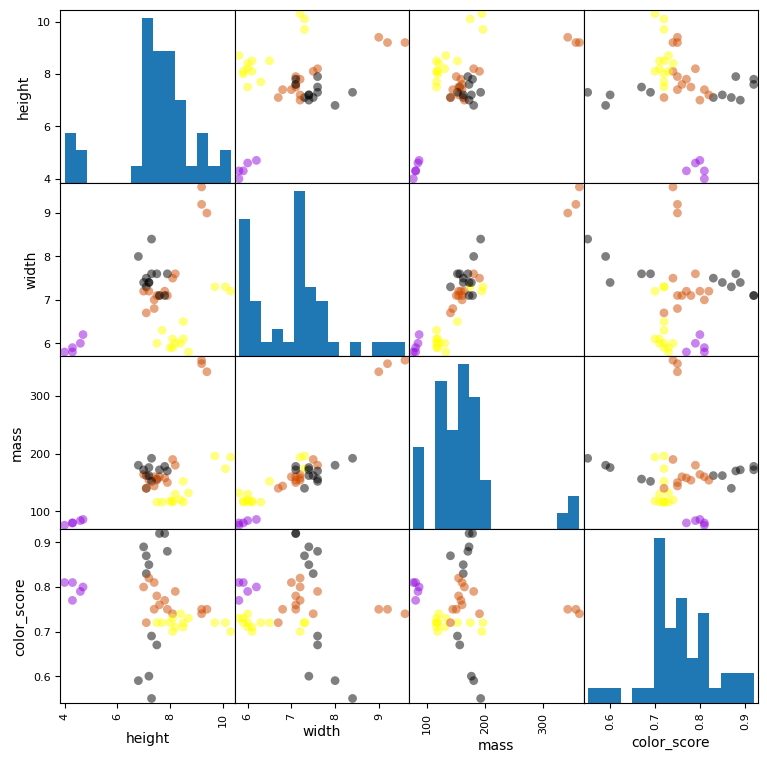

In [33]:
cmap = plt.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= Y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

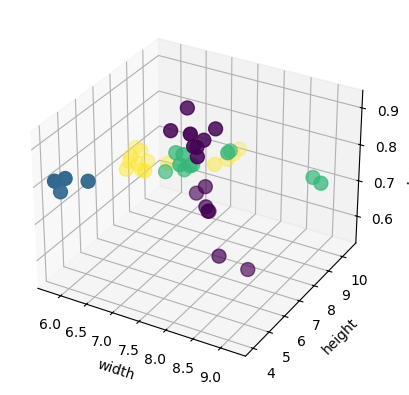

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = Y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

******KNN******


In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.4

In [6]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

In [46]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)
fruit_prediction = knn.predict(new_data)
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [47]:
new_fruit = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = knn.predict(new_fruit)
lookup_fruit_name[fruit_label_pred[0]] 


'orange'

In [48]:
new_fruit = pd.DataFrame([[7.1, 6.2, 160.0, 0.72]], columns=X.columns)
fruit_label_pred = knn.predict(new_fruit)
lookup_fruit_name[fruit_label_pred[0]]  


'apple'

***Logistic Regression***



In [38]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train, Y_train)
log_reg.score(X_test, Y_test)



0.6

In [9]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)

fruit_prediction = log_reg.predict(new_data)
lookup_fruit_name[fruit_prediction[0]]


'lemon'

In [10]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = log_reg.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

In [11]:
new_fruit = pd.DataFrame([[7.1, 6.2, 160.0, 0.72]], columns=X.columns)
fruit_label_pred = log_reg.predict(new_fruit)
lookup_fruit_name[fruit_label_pred[0]]  


'apple'

***SVM with linear kernel***

In [39]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)
svm.score(X_test, Y_test)


0.5333333333333333

In [13]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)

fruit_prediction = svm.predict(new_data)
lookup_fruit_name[fruit_prediction[0]]


'mandarin'

In [14]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = svm.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

In [15]:
new_fruit = pd.DataFrame([[7.1, 6.2, 160.0, 0.72]], columns=X.columns)
fruit_label_pred = svm.predict(new_fruit)
lookup_fruit_name[fruit_label_pred[0]]  


'apple'

***SVM with rbf kernel***

In [40]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, Y_train)
svm_rbf.score(X_test, Y_test)


0.13333333333333333

In [17]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)

fruit_prediction = svm_rbf.predict(new_data)
lookup_fruit_name[fruit_prediction[0]]


'lemon'

In [18]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = svm_rbf.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

In [19]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = svm_rbf.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

***decision trees***

In [41]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)


0.6666666666666666

In [21]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)

fruit_prediction = dt.predict(new_data)
lookup_fruit_name[fruit_prediction[0]]


'lemon'

In [22]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = dt.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

In [23]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = dt.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

***Naive Bayes***

In [4]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, Y_train)
nb.score(X_test, Y_test)


0.6

In [7]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)

fruit_prediction = nb.predict(new_data)
lookup_fruit_name[fruit_prediction[0]]


'lemon'

In [9]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = nb.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

In [10]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = nb.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

***random forest***

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)


0.7333333333333333

In [13]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)

fruit_prediction = rf.predict(new_data)
lookup_fruit_name[fruit_prediction[0]]


'lemon'

In [14]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = rf.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

In [15]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = rf.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 


'apple'

***Gradient Boosting***

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42) 
gb.fit(X_train, Y_train) 
gb.score(X_test, Y_test)

1.0

In [26]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns) 
fruit_prediction = gb.predict(new_data) 
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [27]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = gb.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 

'apple'

In [29]:
new_data = pd.DataFrame([[7.1, 7.0, 154, 0.88]], columns=X.columns)
fruit_label_pred = gb.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 

'apple'

In [35]:
new_data = pd.DataFrame([[4.7, 6.2, 86, 0.80]], columns=X.columns)
fruit_label_pred = gb.predict(new_data)
lookup_fruit_name[fruit_label_pred[0]] 

'mandarin'

In [42]:
model_scores = {
    "KNN": knn.score(X_test, Y_test),
    "Logistic Regression": log_reg.score(X_test, Y_test),
    "SVM (Linear)": svm.score(X_test, Y_test),
    "SVM (RBF)": svm_rbf.score(X_test, Y_test),
    "Decision Tree": dt.score(X_test, Y_test),
    "Naive Bayes": nb.score(X_test, Y_test),
    "Random Forest": rf.score(X_test, Y_test),
    "Gradient Boosting": gb.score(X_test, Y_test)
}

comparison_df = pd.DataFrame(model_scores.items(),columns=["Model", "Accuracy"])
comparison_df


,Model,Accuracy
0,KNN,0.400000
1,Logistic Regression,0.600000
2,SVM (Linear),0.533333
3,SVM (RBF),0.133333
4,Decision Tree,0.666667
5,Naive Bayes,0.600000
6,Random Forest,0.733333
7,Gradient Boosting,1.000000


In [43]:
new_data = pd.DataFrame([[100, 6.3, 8.5, 0.1]], columns=X.columns)

model_predictions = {
    "KNN": lookup_fruit_name[knn.predict(new_data)[0]],
    "Logistic Regression": lookup_fruit_name[log_reg.predict(new_data)[0]],
    "SVM (Linear)": lookup_fruit_name[svm.predict(new_data)[0]],
    "SVM (RBF)": lookup_fruit_name[svm_rbf.predict(new_data)[0]],
    "Decision Tree": lookup_fruit_name[dt.predict(new_data)[0]],
    "Gradient Boosting": lookup_fruit_name[gb.predict(new_data)[0]]
}

comparison_df["Prediction"] = comparison_df["Model"].map(model_predictions)

comparison_df


,Model,Accuracy,Prediction
0,KNN,0.400000,mandarin
1,Logistic Regression,0.600000,lemon
2,SVM (Linear),0.533333,mandarin
3,SVM (RBF),0.133333,lemon
4,Decision Tree,0.666667,lemon
5,Naive Bayes,0.600000,NaN
6,Random Forest,0.733333,NaN
7,Gradient Boosting,1.000000,lemon
